In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X_data.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [5]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
y_data = cancer["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

## 1. Tren en unsupervised modell på treningsdataene (X_train) 
I dette tilfellet vet vi at vi er ute etter to ulike utfall/klasser (syk/ikke-syk) derfor kan vi anta at K=2

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

## 2.Gjør prediksjon på testdataene og oppsummer klassifiseringen i TP, TN, FP, FN med en confusion matrix og skriv ut F1-skår

In [13]:
y_hat_test = kmeans.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
cm = confusion_matrix(y_test, y_hat_test)

Text(0.5, 23.52222222222222, 'Predikert verdi')

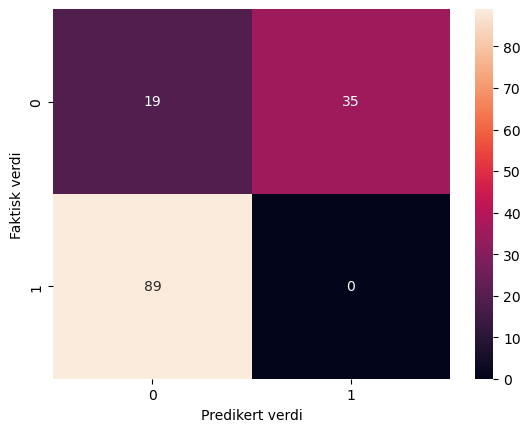

In [42]:
sns.heatmap(cm, annot=True)
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")


In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment

def hungarian_match(y_true, y_pred):
    """
    Matches predicted cluster labels to true labels using the Hungarian algorithm.
    Returns remapped y_pred and accuracy score.
    """

    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    
    # Create a mapping from cluster -> label
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    
    # Remap y_pred
    y_pred_remapped = np.array([mapping[cluster] for cluster in y_pred])
    acc = accuracy_score(y_true, y_pred_remapped)
    
    return y_pred_remapped, acc, mapping


In [44]:
_, acc, mapping = hungarian_match(y_test, y_hat_test)

In [45]:
print("Mapping (cluster -> label):", mapping)
print("Accuracy:", acc)

Mapping (cluster -> label): {1: 0, 0: 1}
Accuracy: 0.8671328671328671


In [49]:
y_hat_test = (y_hat_test==0)*1

In [50]:
f1_score(y_test, y_hat_test)

0.9035532994923858

Text(0.5, 23.52222222222222, 'Predikert verdi')

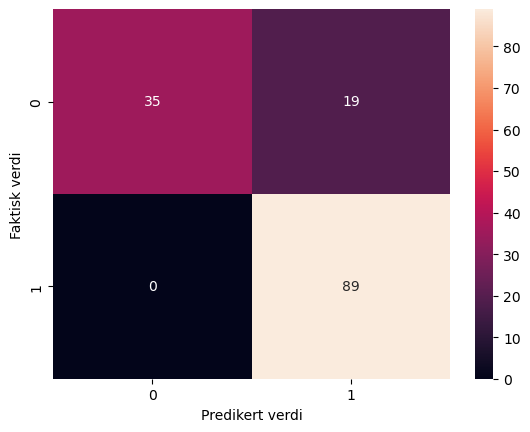

In [51]:
cm = confusion_matrix(y_test, y_hat_test)
sns.heatmap(cm, annot=True)
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")


## 3. Reduser dimensjonaliteten på de 30 egenskapene i testdataene slik at de kan prosjiseres i et 2d-plan (Tips: TSNE, PCA eller UMAP)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

## 4. Plott testdataene (de dimensjonalitetsreduserte) og velg form og farge på scatterplottet slik at det er mulig skille TP, TN, FP, FN fra hverandre

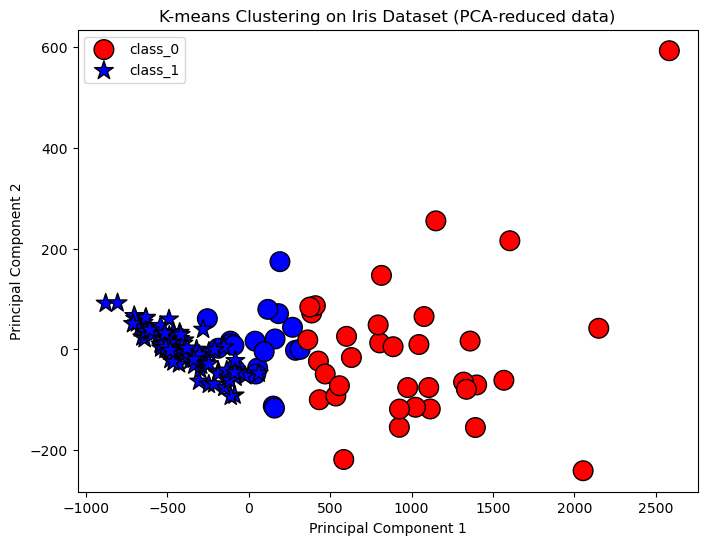

In [54]:
colors = {0: 'red', 1: 'blue'}

scatter_colors = [colors[cluster] for cluster in y_hat_test]
scatter_colors = np.asarray(scatter_colors)


plt.figure(figsize=(8, 6))

markers = ["o","*"]
for i in range(2):


    plt.scatter(X_pca[:, 0][y_test==i], X_pca[:, 1][y_test==i], c=scatter_colors[y_test==i], marker=markers[i], edgecolor='k', s=200, label=f"class_{i}")
    #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("K-means Clustering on Iris Dataset (PCA-reduced data)")
    plt.legend()
plt.show()

## 5. Undersøk om det er noen andre grupper som "fanges" opp av kluster-modellen

In [68]:
X_test["mean radius thr"] = (X_test["mean radius"] > X_test["mean radius"].mean())*1

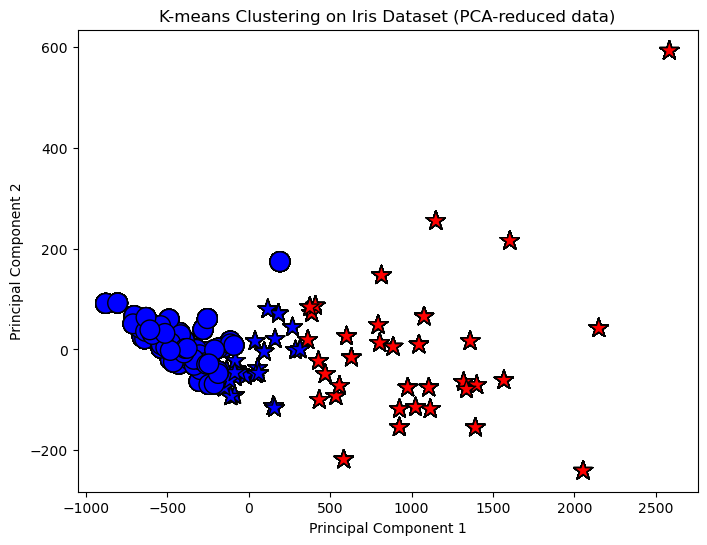

In [71]:
colors = {0: 'red', 1: 'blue'}

scatter_colors = [colors[cluster] for cluster in y_hat_test]
scatter_colors = np.asarray(scatter_colors)


plt.figure(figsize=(8, 6))

markers = ["o","*"]
for i in np.asarray(X_test["mean radius thr"]):


    plt.scatter(X_pca[:, 0][X_test["mean radius thr"]==i], X_pca[:, 1][X_test["mean radius thr"]==i], c=scatter_colors[X_test["mean radius thr"]==i], marker=markers[i], edgecolor='k', s=200, label=f"class_{i}")
    #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("K-means Clustering on Iris Dataset (PCA-reduced data)")
    #plt.legend()
plt.show()